In [48]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [49]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [50]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.551380,-1.876815,-1.807618,-1.557932,-0.039809,0
1,-0.148084,-3.129695,0.387900,-1.322573,-1.448057,0
2,-3.874607,-1.727474,-0.943985,-2.895265,0.601189,1
3,1.709298,-0.825889,2.392230,-1.987155,1.819194,0
4,1.802057,-0.911493,0.022074,-2.545045,2.194047,0


In [17]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [111]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [45]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [132]:
df1 = combined_sampling(df,0.5,0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [133]:
df2 = combined_sampling(df,0.5,0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [134]:
df3 = combined_sampling(df,0.5,0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [135]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col1', 'target'], dtype='object')
Index(['col5', 'col1', 'target'], dtype='object')
Index(['col3', 'col2', 'target'], dtype='object')


In [141]:
df3

,col3,col2,target
2,-0.943985,-1.727474,1
53,2.879522,-1.179645,0
17,-0.601854,0.240279,1
12,-1.209724,0.077615,1
8,-0.147061,-0.352877,0
6,-1.029536,-0.770751,1
94,-0.930578,-1.265605,1
4,0.022074,-0.911493,0
38,2.538559,-1.042250,0
40,0.595038,-0.162759,0


In [136]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [137]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
from sklearn.tree import plot_tree

[Text(167.4, 199.32, 'X[1] <= 0.417\ngini = 0.487\nsamples = 50\nvalue = [21, 29]'),
 Text(55.800000000000004, 163.07999999999998, 'X[0] <= -1.244\ngini = 0.198\nsamples = 27\nvalue = [3, 24]'),
 Text(27.900000000000002, 126.83999999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(83.7, 126.83999999999999, 'X[1] <= 0.149\ngini = 0.077\nsamples = 25\nvalue = [1, 24]'),
 Text(55.800000000000004, 90.6, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(111.60000000000001, 90.6, 'X[0] <= 1.129\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(83.7, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(139.5, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(279.0, 163.07999999999998, 'X[1] <= 2.099\ngini = 0.34\nsamples = 23\nvalue = [18, 5]'),
 Text(251.10000000000002, 126.83999999999999, 'X[1] <= 1.129\ngini = 0.245\nsamples = 21\nvalue = [18, 3]'),
 Text(223.20000000000002, 90.6, 'X[1] <= 0.901\ngini = 0.397\nsamples = 11\nvalue = [8, 3]')

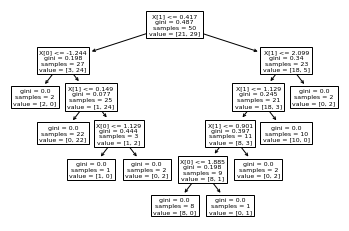

In [138]:
plot_tree(clf1)

[Text(209.25, 201.90857142857143, 'X[1] <= -0.391\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(167.4, 170.84571428571428, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(251.10000000000002, 170.84571428571428, 'X[0] <= 3.267\ngini = 0.367\nsamples = 33\nvalue = [25, 8]'),
 Text(209.25, 139.78285714285715, 'X[1] <= 0.588\ngini = 0.278\nsamples = 30\nvalue = [25, 5]'),
 Text(167.4, 108.72, 'X[1] <= 0.357\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(125.55000000000001, 77.65714285714284, 'X[1] <= -0.15\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(83.7, 46.59428571428572, 'X[1] <= -0.162\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(41.85, 15.531428571428563, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(125.55000000000001, 15.531428571428563, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(167.4, 46.59428571428572, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(209.25, 77.65714285714284, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(251.10000000

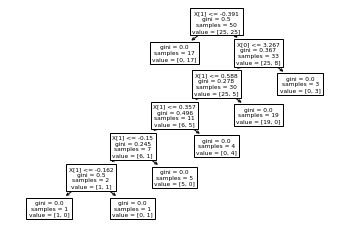

In [139]:
plot_tree(clf2)

[Text(251.10000000000002, 199.32, 'X[0] <= -0.208\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(209.25, 163.07999999999998, 'X[1] <= -1.513\ngini = 0.271\nsamples = 31\nvalue = [5, 26]'),
 Text(167.4, 126.83999999999999, 'X[1] <= -1.558\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(125.55000000000001, 90.6, 'X[1] <= -1.972\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(83.7, 54.359999999999985, 'X[1] <= -2.141\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(41.85, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(125.55000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(167.4, 54.359999999999985, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(209.25, 90.6, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(251.10000000000002, 126.83999999999999, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(292.95, 163.07999999999998, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]')]

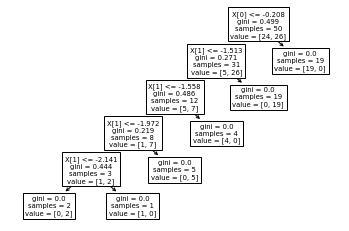

In [140]:
plot_tree(clf3)

In [143]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

array([1])

In [144]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

array([0])

In [145]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

array([1])

In [ ]:
df.sample(14,replace=True)

,humidity,wind,play
0,0,1,0
0,0,1,0
0,0,1,0
10,1,0,1
13,0,0,0
4,1,1,1
7,0,1,0
6,1,0,1
4,1,1,1
3,0,1,1
